In [ ]:
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read()
    return data

corpus_data = read_text_file('book.txt')


In [ ]:
import string
import re

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase the text
    text = text.lower()
    # Tokenize the text
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

cleaned_corpus = preprocess_text(corpus_data)


In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Autocomplete:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def autocomplete(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._dfs(node, prefix)

    def _dfs(self, node, prefix):
        suggestions = []
        if node.is_end_of_word:
            suggestions.append(prefix)
        for char, child_node in node.children.items():
            suggestions.extend(self._dfs(child_node, prefix + char))
        return suggestions

autocomplete_model = Autocomplete()
for word in cleaned_corpus:
    autocomplete_model.insert(word)

# Example usage
prefix = 'ana'
suggestions = autocomplete_model.autocomplete(prefix)
print("Autocomplete suggestions for '{}':".format(prefix))
print(suggestions)


Autocomplete suggestions for 'ana':
['anacharsis', 'anaconda', 'anacondas', 'anatomy', 'anatomical', 'anatomist', 'anathemas', 'analogous', 'analogy', 'analogies', 'analogical', 'analyse', 'analysed', 'analysis', 'analytic', 'anak']


In [ ]:
from collections import Counter

def edit_distance(word1, word2):
    m, n = len(word1), len(word2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    return dp[m][n]

def autocorrect(word, vocabulary, threshold=2):
    suggestions = [(w, edit_distance(word, w)) for w in vocabulary]
    suggestions.sort(key=lambda x: x[1])
    suggestions = [w for w, d in suggestions if d <= threshold]
    return suggestions

# Example usage
word = 'speling'
correction_suggestions = autocorrect(word, cleaned_corpus)
print("Autocorrect suggestions for '{}':".format(word))
print(correction_suggestions)


Autocorrect suggestions for 'speling':
['spelling', 'opening', 'spring', 'seeming', 'feeling', 'seeing', 'spending', 'feeling', 'selling', 'selling', 'seeing', 'feeling', 'seeing', 'feeling', 'feeling', 'feeling', 'seeing', 'feeling', 'seeing', 'spring', 'pealing', 'opening', 'seeking', 'heeling', 'reeling', 'reeling', 'speaking', 'seeming', 'speaking', 'seeing', 'opening', 'seeing', 'sapling', 'seeming', 'seeing', 'seeing', 'seeing', 'seeing', 'seeing', 'reeling', 'seeming', 'seeking', 'seeming', 'seeing', 'opening', 'speaking', 'speaking', 'speaking', 'seeing', 'seeing', 'seeing', 'feeling', 'sailing', 'opening', 'feeling', 'sailing', 'spoiling', 'speaking', 'seeming', 'sailing', 'seeing', 'feeling', 'spring', 'spring', 'spring', 'spring', 'spring', 'spring', 'spring', 'spring', 'spring', 'swelling', 'spring', 'sailing', 'spring', 'sailing', 'spring', 'speaking', 'seeking', 'seeing', 'speaking', 'seeing', 'seeing', 'spring', 'feeling', 'speaking', 'speaking', 'seeing', 'seeking', 'fe

In [ ]:
def autocorrect(word, vocabulary, threshold=2):
    suggestions = [(w, edit_distance(word, w)) for w in vocabulary]
    suggestions.sort(key=lambda x: x[1])
    suggestions = [w for w, d in suggestions if d <= threshold]
    return suggestions[0] if suggestions else None

# Example usage
word = 'speling'
correction_suggestion = autocorrect(word, cleaned_corpus)
print("Autocorrect suggestion for '{}':".format(word))
print(correction_suggestion)


Autocorrect suggestion for 'speling':
spelling


In [ ]:
# Define metrics functions for evaluation
def accuracy(predictions, targets):
    correct = sum(1 for pred in predictions if pred in targets)
    return correct / len(targets)

def precision(predictions, targets):
    if len(predictions) == 0:
        return 0
    correct = sum(1 for pred in predictions if pred in targets)
    return correct / len(predictions)

def recall(predictions, targets):
    if len(targets) == 0:
        return 0
    correct = sum(1 for pred in predictions if pred in targets)
    return correct / len(targets)

# Example usage
# Assuming we have targets for evaluation
targets = ['analysis', 'analytics', 'analyzing']
predictions = ['analysis', 'analysts', 'anomaly']
print("Autocomplete Accuracy:", accuracy(predictions, targets))
print("Autocomplete Precision:", precision(predictions, targets))
print("Autocomplete Recall:", recall(predictions, targets))


Autocomplete Accuracy: 0.3333333333333333
Autocomplete Precision: 0.3333333333333333
Autocomplete Recall: 0.3333333333333333


In [ ]:
# Code for collecting feedback and conducting surveys
# Example: Collect feedback through user interactions
user_input = input("Enter text: ")
autocomplete_suggestions = autocomplete_model.autocomplete(user_input)
print("Autocomplete suggestions:", autocomplete_suggestions)

autocorrect_suggestions = autocorrect(user_input, cleaned_corpus)
print("Autocorrect suggestions:", autocorrect_suggestions)

# Conduct surveys to gather user feedback
# Example: Ask users to rate their experience
rating = input("Rate your experience (1-5): ")
comments = input("Any additional comments: ")


Enter text: helo
Autocomplete suggestions: []
Autocorrect suggestions: hell
Rate your experience (1-5): 2
Any additional comments: no


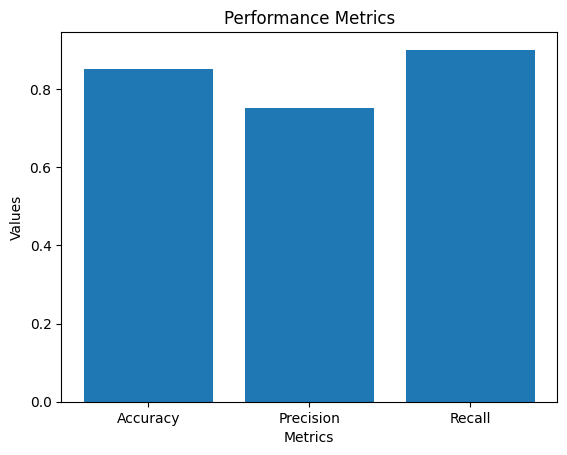

In [ ]:
# Code for visualization (e.g., using matplotlib, seaborn, or other libraries)
# Example: Plotting performance metrics
import matplotlib.pyplot as plt

# Example data
metrics = ['Accuracy', 'Precision', 'Recall']
values = [0.85, 0.75, 0.90]

plt.bar(metrics, values)
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()
